# Computergestützte Mathematik zur Analysis

21.01.2021

Prof. Dr. Rüdiger Braun

Klausuranmeldung im Studierendenportal ist jetzt möglich

In [1]:
from sympy import *
import numpy as np
from matplotlib import pyplot as plt
init_printing()

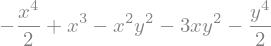

In [2]:
x = S('x')
y = S('y')
f = -x**4/2 - x**2*y**2 - y**4/2 + x**3 - 3*x*y**2
f

# 3D-Plots mit `matplotlib`

In [3]:
from mpl_toolkits.mplot3d import Axes3D

Der Import definiert einige Klassen um.  `Axes3d` selbst brauchen wir gar nicht

In [4]:
xn = np.linspace(-3*np.pi, 3*np.pi)
yn = np.linspace(-3*np.pi, 3*np.pi)
X, Y = np.meshgrid(xn, yn)
X.shape

In [5]:
Z = np.cos(np.sqrt(X**2+Y**2))

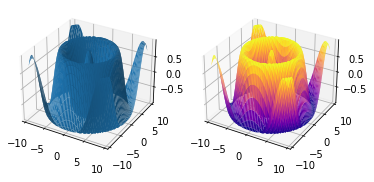

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
# 1x2-Matrix von Plots, davon Element 1
ax1.plot_surface(X, Y, Z)
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z, cmap=plt.cm.plasma)  # default ist viridis
plt.savefig('test.pdf')

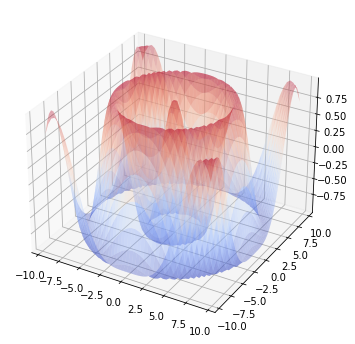

In [7]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm, alpha=.35);

Wenn's schnell gehen soll

In [8]:
xn = np.linspace(-3*np.pi, 3*np.pi, 200)
yn = np.linspace(-3*np.pi, 3*np.pi, 200)
X, Y = np.meshgrid(xn, yn)
Z = np.cos(np.sqrt(X**2+Y**2))

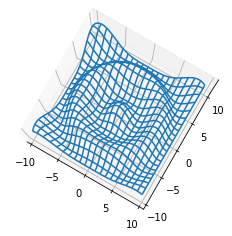

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
ax.view_init(84,-60);  # (hoehe, azimuth)
ax.set_zticks([]);

In [10]:
fn = lambdify((x,y), f)

In [11]:
xn = np.linspace(-1.2, 2, 350)
yn = np.linspace(-1.7, 1.7, 350)
X, Y = np.meshgrid(xn,yn)
Z = fn(X,Y)

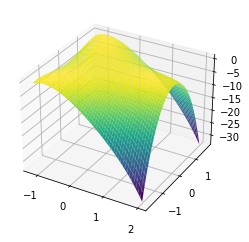

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis);

In [13]:
ax.set_zlim3d(bottom=-5)
#ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis);

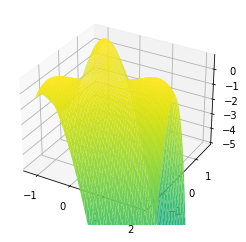

In [14]:
fig

Das ist ziemlich unbrauchbar

# Contourplots

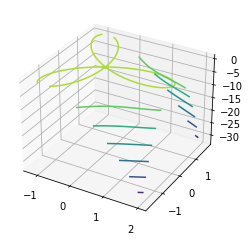

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.contour(X, Y, Z);

Was ist der Maximum von $f$?

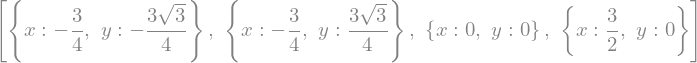

In [16]:
gr = Matrix([f]).jacobian([x,y])
lsg = solve(gr, {x,y})
lsg

In [17]:
for l in lsg:
    display(fn(x.subs(l), y.subs(l)))

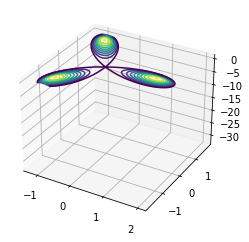

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.contour(X, Y, Z, levels=np.linspace(0, .84, 10));

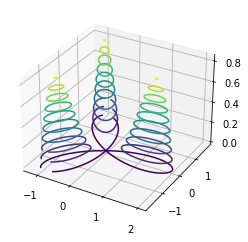

In [19]:
ax.set_zlim(bottom=-.01)
fig

In [20]:
np.concatenate([np.linspace(0,1,3), np.linspace(0,10,4)])

array([ 0.        ,  0.5       ,  1.        ,  0.        ,  3.33333333,
        6.66666667, 10.        ])

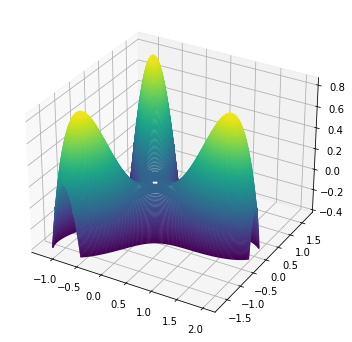

In [21]:
b = -.4
u = .85
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
l1 = np.linspace(b, u, 150)
l2 = np.linspace(-.02, .02, 100)
levels = np.sort(np.concatenate([l1, l2]))
ax.contour(X, Y, Z, levels=levels)
ax.set_zlim(bottom=b);

Alternative:  https://docs.enthought.com/mayavi/mayavi/

# Gewöhnliche Differentialgleichungen

In [22]:
x = Symbol('x')
y = Function('y')

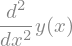

In [23]:
y(x).diff(x,2)

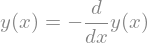

In [24]:
dgl = Eq(y(x), -y(x).diff(x))
dgl

In [25]:
lsg = dsolve(dgl)
lsg

# Anfangswertaufgabe

Löse $y(2)=16$ 

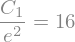

In [26]:
glg = Eq(lsg.rhs.subs(x,2), 16)
glg

In [27]:
ab_lsg = solve({glg})
ab_lsg

In [28]:
f = lsg.rhs.subs(ab_lsg)
f

Wenn man das Symbol $C_1$ doch mal braucht:

In [29]:
print(ab_lsg)

{C1: 16*exp(2)}


In [30]:
C1 = Symbol('C1')
lsg.rhs.subs('C1', 16*E**2)

Aufgabe:  $y' = y - x^3 + 3x - 2$, $y(1) = 4$

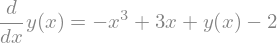

In [31]:
dgl = Eq(y(x).diff(x), y(x)-x**3+3*x-2)
dgl

In [32]:
lsg = dsolve(dgl)
lsg

In [33]:
phi = lsg.rhs.expand()
phi

In [34]:
glg = Eq(phi.subs(x,1), 4)
glg

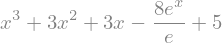

In [35]:
ab_lsg = solve({glg})
phi_s = phi.subs(ab_lsg)
phi_s

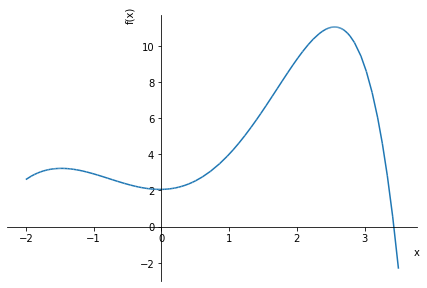

In [36]:
plot(phi_s, (x, -2, 3.5));

Lösungskurven für verschiedene Anfangsbedingungen

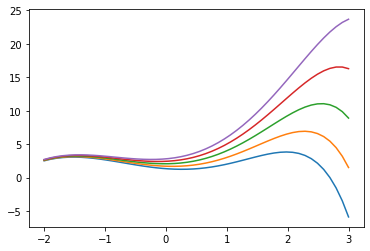

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)
xn = np.linspace(-2,3)
x0 = 1
for y0 in range(2, 7):
    ab = Eq(phi.subs(x, x0), y0)
    ab_lsg = solve({ab})
    fn = lambdify(x, phi.subs(ab_lsg), 'numpy')
    ax.plot(xn, fn(xn))

# Zeichnung des Richtungsfelds

In [38]:
nx = 13
ny = 11 
xq = np.linspace(-2, 3, nx)
yq = np.linspace(-5, 25, ny)
X, Y = np.meshgrid(xq, yq)
vf = np.zeros_like(X)
X.shape, vf.shape

In [39]:
for j in range(nx):
    for k in range(ny):
        vf[k,j] = dgl.rhs.subs({x: xq[j], y(x): yq[k]})

In [40]:
U = np.ones_like(X)
V = vf
ax.quiver(X, Y, U, V, angles='xy');
# quiver: Köcher
# X, Y: Fußpunkte der Pfeile
# U, V: Koordinaten der Pfeile, gemessen vom Fußpunkt
# angles='xy':  Koordinaten der Pfeile proportional zu den Einheiten der Achsen

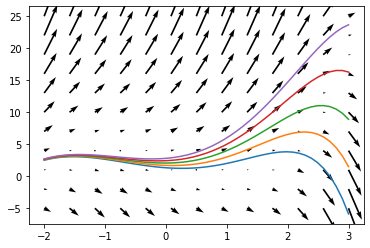

In [41]:
fig

# Definitionsbereiche

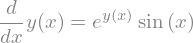

In [42]:
dgl = Eq(y(x).diff(x), exp(y(x))*sin(x))
dgl

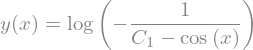

In [43]:
lsg = dsolve(dgl)
lsg

<lambdifygenerated-9>:2: RuntimeWarning: invalid value encountered in log
  return (log(-1/(-cos(x) - 0.84)))
<lambdifygenerated-10>:2: RuntimeWarning: invalid value encountered in log
  return (log(-1/(-cos(x) - 0.56)))
<lambdifygenerated-11>:2: RuntimeWarning: invalid value encountered in log
  return (log(-1/(-cos(x) - 0.28)))
<lambdifygenerated-12>:2: RuntimeWarning: invalid value encountered in log
  return (log(cos(x)**(-1.0)))
<lambdifygenerated-13>:2: RuntimeWarning: invalid value encountered in log
  return (log(-1/(0.28 - cos(x))))
<lambdifygenerated-14>:2: RuntimeWarning: invalid value encountered in log
  return (log(-1/(0.56 - cos(x))))
<lambdifygenerated-15>:2: RuntimeWarning: invalid value encountered in log
  return (log(-1/(0.84 - cos(x))))
<lambdifygenerated-16>:2: RuntimeWarning: invalid value encountered in log
  return (log(-1/(1.12 - cos(x))))
<lambdifygenerated-17>:2: RuntimeWarning: invalid value encountered in log
  return (log(-1/(1.4 - cos(x))))


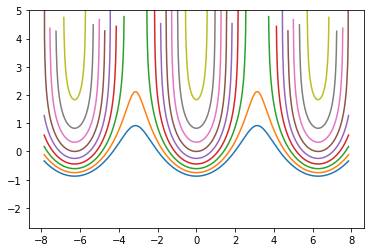

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
xn = np.linspace(-2.5*np.pi, 2.5*np.pi, 900)
x0 = 1
C1 = S('C1')
for C in np.linspace(-1.4, 1.4, 11):
    fn = lambdify(x, lsg.rhs.subs(C1, C))
    ax.plot(xn, fn(xn))
ax.axis(ymax=5)

Für welche $y_0$ is die Lösung der Anfangsbedingung $y(0)=y_0$ auf ganz $\mathbb R$ definiert?

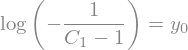

In [45]:
y0 = Symbol('y0')
ab_glg = Eq(lsg.rhs.subs(x,0), y0)
ab_glg

In [46]:
ab_lsg = solve(ab_glg, {C1})
C = ab_lsg[0]
C

Die Lösung ist genau dann auf $\mathbb R$ definiert, wenn $C < -1$ oder $C>1$.  Letzteres ist unmöglich.

In [47]:
solve(C<-1)

In [48]:
phi0 = lsg.rhs.subs(C1, -1.01)

Bestimmen den Definitionsbereich der Lösung zur Anfangsbedingung $y(0)=1$.

In [49]:
C0= C.subs(y0,1)
C0

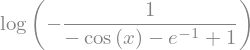

In [50]:
phi1 = lsg.rhs.subs(C1, C0)
phi1

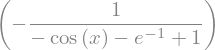

In [51]:
tmp = phi1.args
tmp

In [52]:
#solve(1/tmp)  # TypeError

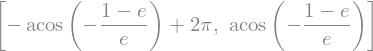

In [53]:
def_lsg = solve(1/tmp[0])
def_lsg

In [54]:
b = float(def_lsg[1].n())

<lambdifygenerated-19>:2: RuntimeWarning: divide by zero encountered in true_divide
  return (log(-1/(-cos(x) - exp(-1) + 1)))
<lambdifygenerated-19>:2: RuntimeWarning: invalid value encountered in log
  return (log(-1/(-cos(x) - exp(-1) + 1)))


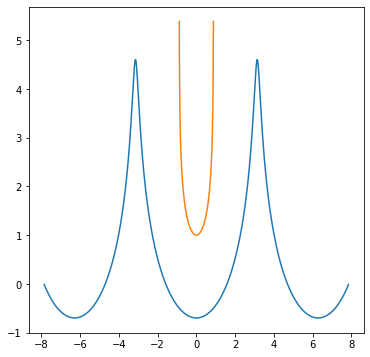

In [55]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
f0n = lambdify(x, phi0, 'numpy')
ax.plot(xn, f0n(xn))
tn = np.linspace(-b, b, 300)
f1n = lambdify(x, phi1, 'numpy')
ax.plot(tn, f1n(tn));

In [56]:
nx = 25
ny = 19 
xq = np.linspace(-8, 8, nx)
yq = np.linspace(-1, 1.6, ny)
X, Y = np.meshgrid(xq, yq)
vf = np.zeros_like(X)
for j in range(nx):
    for k in range(ny):
        vf[k,j] = dgl.rhs.subs({x: xq[j], y(x): yq[k]})
U = np.ones_like(X)
V = vf
ax.quiver(X, Y, U, V, angles='xy');

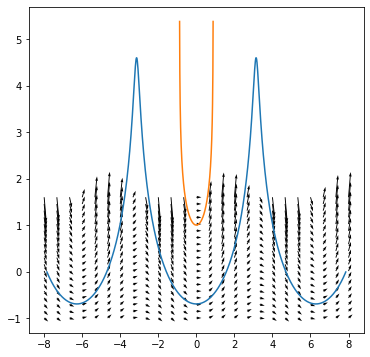

In [57]:
fig